# Formative Coursework

Please enter your name and student number into the Markdown cell below.

#### Name: Zhanyu Shi
#### Student Number: 10235388

In each of the assessed courseworks, you will be asked to answer a series of questions based on what you have learnt in class. The number of marks available for each question will be clearly displayed along with a short rubric outlining what you need to do to get the marks. The purpose of this formative coursework is to give you the opportunity to practise some example coursework questions and to see what you need to do to reach each grade boundary. Feedback on all submitted coursework will be provided within 15 working days (i.e. not counting weekends or bank holidays), so you should see your formative feedback before you have to submit your first assessed coursework.

For each question, you should input your answers into the code and/or markdown (text) cells provided. In general, you should provide as much explanatory information as you can in the markdown cells (if appropriate) and make sure you include comments in your code in order to give yourself the best chance of maximising your marks. You are free to discuss the coursework tasks with other students, but the work you submit must be your own. Make sure you are familiar with the University of Manchester's [documentation on plagiarism](http://www.regulations.manchester.ac.uk/guidance-to-students-on-plagiarism-and-other-forms-of-academic-malpractice/) to ensure you don't break any rules.

Your coursework will be marked using the same version of Python as is available in the Simon building computer cluster. It is your responsibility to ensure that your code works in this version of Python. If your code does not run correctly due to incompactibility issues between the version of Python you used and the version that is used to mark your coursework, you will not get the marks! Therefore, it is recommended that you test your code in the Simon building cluster before you submit.

In this coursework, you will be asked to analyse some data. The code below uniquely generates your own set of data based on your student ID number (this is one of the techniques we will be using to ensure that you have not copied someone else's work). Please enter your student number after the = sign on the first line below and run this code without altering anything below the first line before beginning the rest of the coursework. It is essential that you double check that you have entered the right student number, otherwise you may be accused of plagiarism.

In [7]:
ID=10235388
import numpy as np
np.random.seed(ID)
n=100
x=np.linspace(0,100,n)
y=(ID % 3+1)*x**(ID % 4)+(ID % 2+1)*x+(ID % 100) # y=x+88
y=y+np.random.normal(0,(y[-1]-y[1])/20,n) # 0-5
data=np.transpose(np.array([x,y]))
del n
del x
del y

The command above has created some sample data as an array of coupled $x$ and $y$ values called <code>data</code>. We shall use this data throughout the rest of the coursework.

#### <span style="color: red"> Task 1:</span> Plot the data contained in the array called <code>data</code> <span style="color: red"> (3 marks)</span>

Label the horizontal axis as _x-axis_ and the vertical axis as _y-axis_.

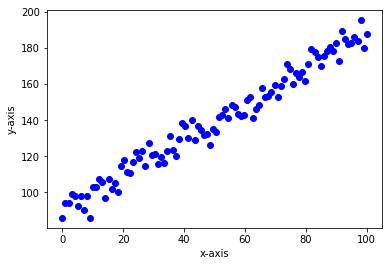

In [8]:
import matplotlib.pyplot as plt
for couple in data:
    plt.plot(couple[0],couple[1],'bo')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

#### Marking rubric:

- Appropriate package(s) imported - 1 mark
- Code included to ensure figures appear in notebook - 1 mark
- x and y data selected and plotted correctly and axes correctly labelled - 1 mark

#### <span style="color: red"> Task 2:</span> Carry out regressions on the data and report the fitted functions, giving the values of the fitted parameters to 3 significant figures <span style="color: red"> (10 marks)</span>

Fit the following three functions to the data:

$$y=a_1x+b_1,$$
$$y=a_2x^2+b_2x+c_2,$$
$$y=a_3x^3+b_3x^2+c_3x+d_3.$$

Print out the fitted functions, including the coefficients, in an easy to read way and provide a single plot that shows the three fitted functions as well as the original data.

equation 1: y = 0.983 x + 90.2
equation 2: y = 0.000712 x^2 + 0.912 x + 91.4
equation 3: y = 2.76e-05 x^3 + -0.00342 x^2 + 1.08 x + 90.0


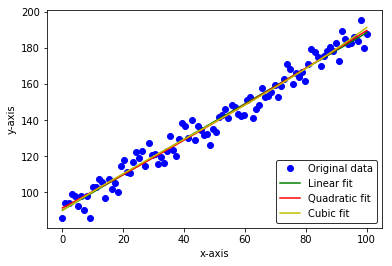

In [19]:
from scipy.optimize import curve_fit
def func1(x,a1,b1):
    return a1*x + b1

def func2(x,a2,b2,c2):
    return a2*x**2 + b2*x + c2

def func3(x,a3,b3,c3,d3):
    return a3*x**3 + b3*x**2 + c3*x + d3

result1, cov1 = curve_fit(func1,data[:,0],data[:,1])
result2, cov2 = curve_fit(func2,data[:,0],data[:,1])
result3, cov3 = curve_fit(func3,data[:,0],data[:,1])

results = list(result1) + list(result2) + list(result3)
results = [float('%.3g'%k) for k in results]

[a1,b1,a2,b2,c2,a3,b3,c3,d3] = results

print('equation 1: y = %s x + %s'%(a1,b1))
print('equation 2: y = %s x^2 + %s x + %s'%(a2,b2,c2))
print('equation 3: y = %s x^3 + %s x^2 + %s x + %s'%
(a3,b3,c3,d3))

x=np.linspace(0,100,100)

plt.plot(data[:,0],data[:,1],'bo',label='Original data')
plt.plot(x,func1(x,a1,b1),'g-',label='Linear fit')
plt.plot(x,func2(x,a2,b2,c2),'r-',label='Quadratic fit')
plt.plot(x,func3(x,a3,b3,c3,d3),'y-',label='Cubic fit')

plt.xlabel('x-axis')
plt.ylabel('y-axis')

leg=plt.legend(loc='lower right',edgecolor='black',frameon=True)

plt.show()

#### Marking rubric:

- Appropriate package(s) imported - 1 mark
- Linear, quadratic and cubic functions correctly defined - 3 marks (1 per function)
- All three functions correctly fitted to the data and parameters correctly identified (each parameter should have a unique name) - 3 marks (1 per function)
- All three functions printed correctly - 1 mark
- All parameters expressed to 3 significant figures (numbers of the form e.g. 2.72e+04 are okay) - 1 mark
- Three fitted functions plotted over data correctly (it should be possible to identify which function is which either from some accompanying text or via a legend) - 1 mark

#### <span style="color: red"> Task 3:</span> Plot the residuals and calculate the mean squared error associated with each fit <span style="color: red"> (8 marks)</span> 

Use a separate cell and plot for each function.

#### Linear fit:

#### Quadratic fit:

#### Cubic fit:

#### Marking rubric:

- Residuals correctly calculated - 3 marks (1 per fit)
- Mean squared errors correctly calculated - 3 marks (1 per fit)
- All statements about mean squared errors appear correctly - 1 mark
- All residual plots appear correctly - 1 mark

#### <span style="color: red"> Task 4:</span> State which function you think is most appropriate for fitting the data and explain why <span style="color: red"> (4 marks)</span>

#### Marking rubric:

- Appropriate function(s) chosen - 1 mark
- Clear justification given for this choice taking into account all of the information that was made available in Task 3 - 3 marks

### For use by markers only:

#### Total mark: $\hspace{1cm}$/25

#### As a percentage: